<img src='https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Foundations of Data Science <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
<font color=3C99D size=5>
    Project: Financial Analysis on Twitter <br>
<font color=696880 size=4>
    Parishad Mokhber - 98100537 <br>
    
____

As it was said to be required, my project is also available at my github account page with the following link:
<href>https://github.com/parishadmk/twitter_financial_sentiment_analysis</href> 

# Part 1: Exploratory Data Analysis (EDA)

in this section we import libraries that we need.then by "head" command we see the data and its columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tweets = pd.read_csv('tweets.csv')
entities = pd.read_csv('entities.csv')
companies = pd.read_csv('companies.csv')

In [2]:
tweets.head()

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017
3,865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Thu May 18 22:00:02 +0000 2017
4,865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:02 +0000 2017


In [3]:
entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [4]:
companies.head()

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


## Part 1:


Statistics on most and least tweeted stocks. Perform segmentation of the companies based on the number of tweets they have. Provide relevant visualizations. we define def comp_symb and plote the tweet from the most yo the least as the number of the stocks. 

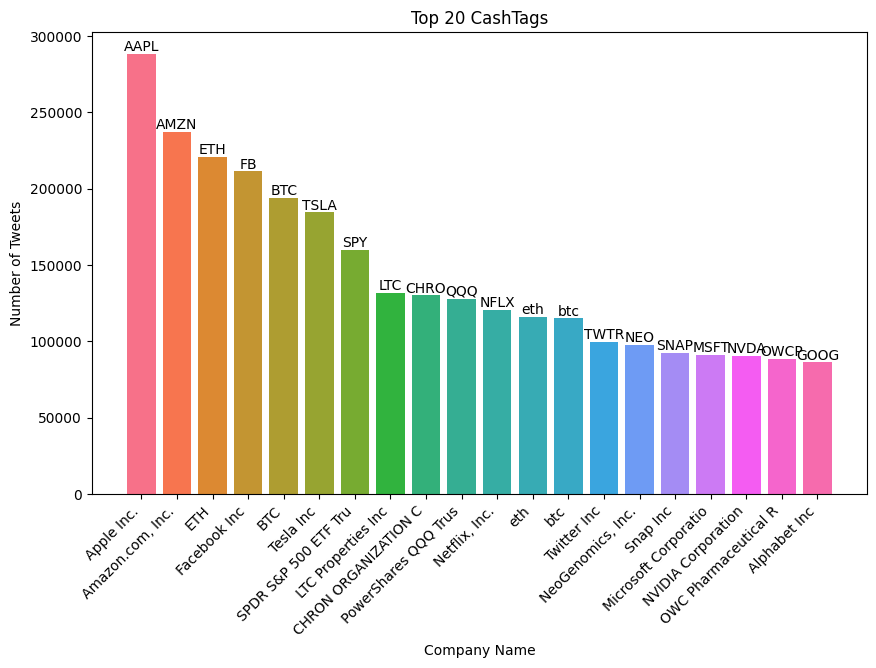

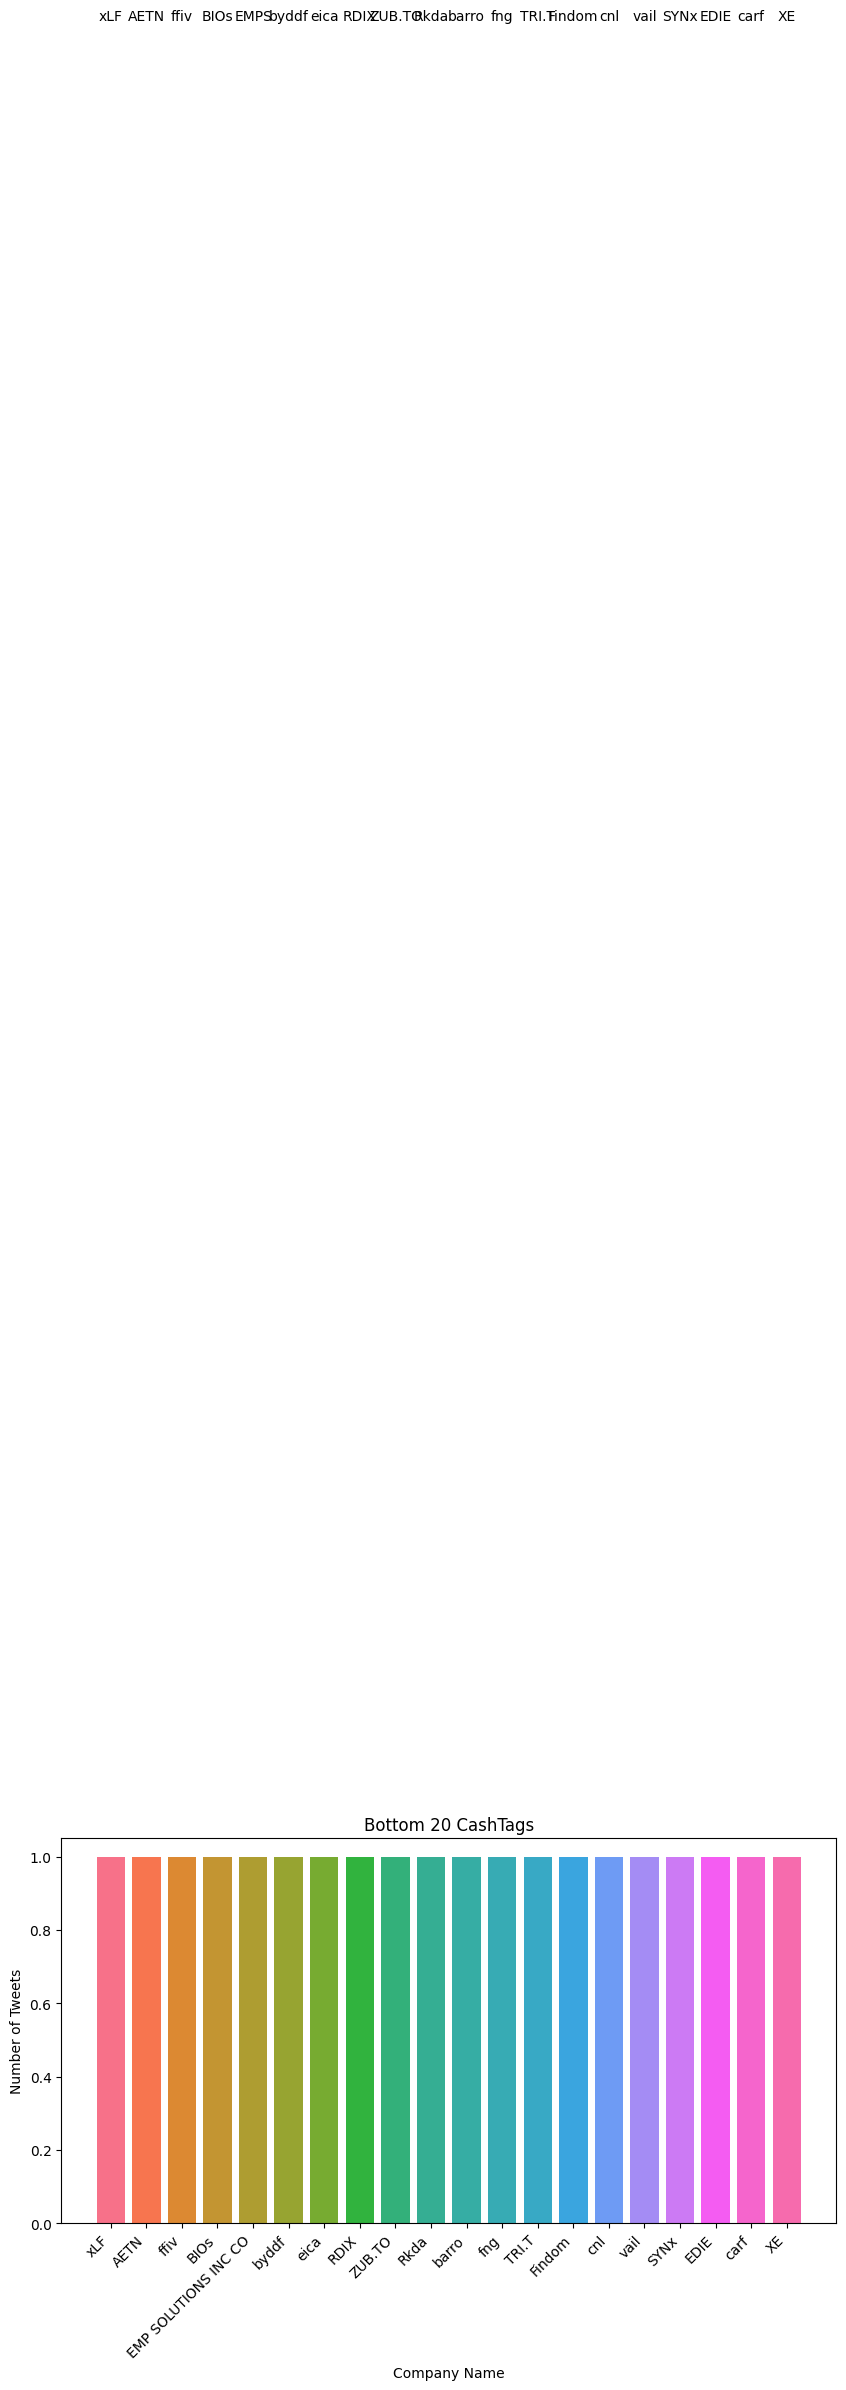

In [7]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

entities = entities[entities['entity_type'] == 'symbol']
value_counts = entities.text.value_counts()


most_tweeted = value_counts.head(20)
least_tweeted = value_counts.tail(20)


def comp_symb(symbols):
    symbol_list = symbols.to_list()
    company_names = []
    
    for symbol in symbol_list:
        matching_companies = companies[companies['ticker'] == symbol]
        
        if not matching_companies.empty:
            index_of_value = matching_companies.index[0]
            company_names.append(companies.at[index_of_value, 'name'])
        else:
            company_names.append(symbol)

    return company_names
      
colors_most_tweeted = sns.color_palette('husl', len(most_tweeted))
plt.figure(figsize=(10, 6))
plt.bar(comp_symb(most_tweeted.index), most_tweeted, color=colors_most_tweeted)


for i, v in enumerate(most_tweeted.index):
    plt.text(i, most_tweeted[v] + 5, v, ha='center', va='bottom', rotation=0)

plt.title('Top 20 CashTags')
plt.ylabel('Number of Tweets')
plt.xlabel('Company Name')
plt.xticks(rotation=45, ha='right')
plt.show()


colors_least_tweeted = sns.color_palette('husl', len(least_tweeted))
plt.figure(figsize=(10, 5))
plt.bar(comp_symb(least_tweeted.index), least_tweeted, color=colors_least_tweeted)

for i, v in enumerate(least_tweeted.index):
    plt.text(i, least_tweeted[v] + 5, v, ha='center', va='bottom', rotation=0)

plt.title('Bottom 20 CashTags')
plt.ylabel('Number of Tweets')
plt.xlabel('Company Name')
plt.xticks(rotation=45, ha='right')
plt.show()

For showing Distribution of Companies Across Different Tweet Volume Segments we use bar plot from plt

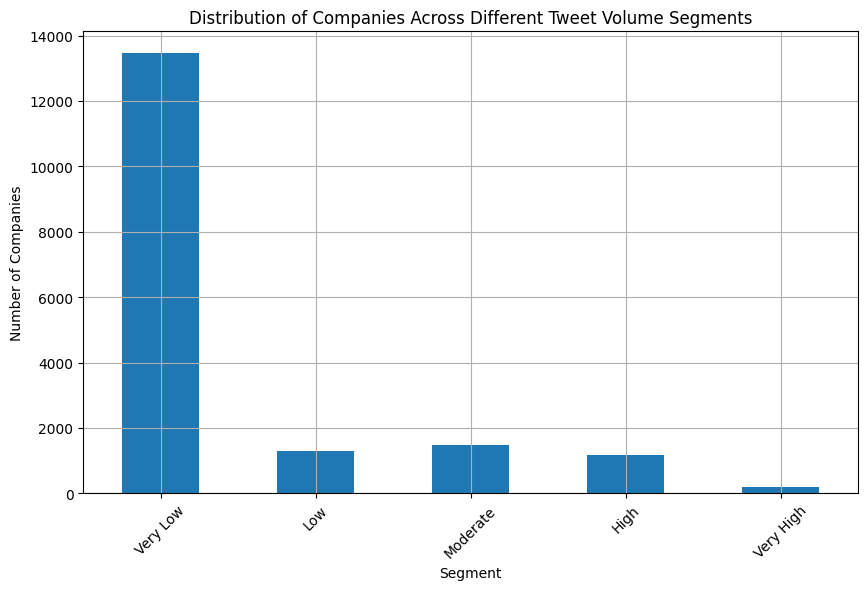

In [8]:
entities = entities[entities['entity_type'] == 'symbol']
tweet_counts = entities['text'].value_counts()

# Segmenting companies based on tweet counts
bin_edges = [0, 500, 1000, 2000, 10000, np.inf] 
bin_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

companies = companies.set_index('ticker')
companies['tweet_count'] = tweet_counts
companies['segment'] = pd.cut(companies['tweet_count'], bins=bin_edges, labels=bin_labels)

segment_distribution = companies['segment'].value_counts().sort_index()

# Bar plot for segment distribution
plt.figure(figsize=(10, 6))
segment_distribution.plot(kind='bar')
plt.title('Distribution of Companies Across Different Tweet Volume Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid()
plt.show()

then for showing Number of Cashtags and Market Capitalizations we use this above plot for different exchanges like NASDAQ, OTCMKTS, NYSEARCA, NYSE, NYSEMKT.

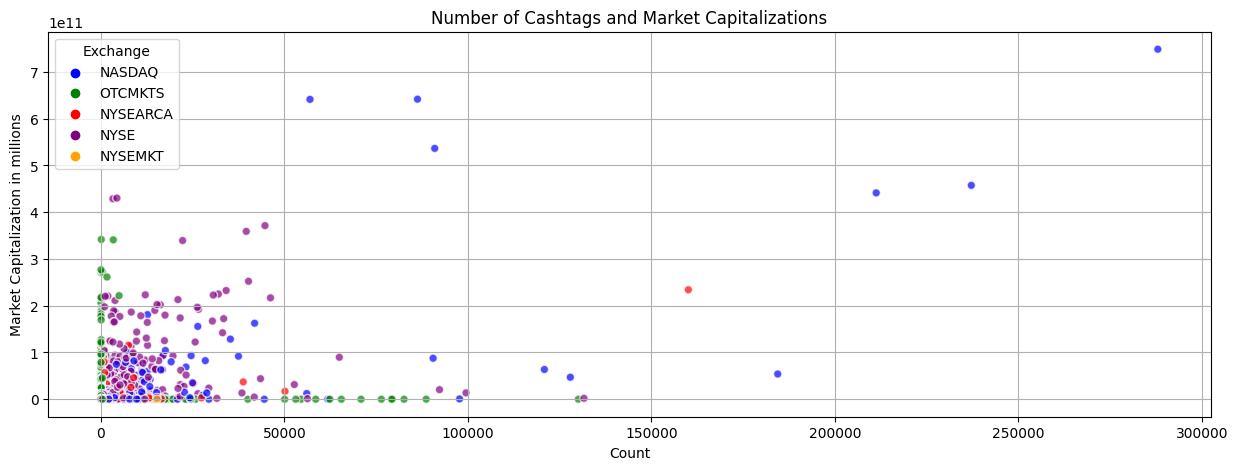

In [9]:
cashtag_counts = entities[entities['entity_type'] == 'symbol']['text'].value_counts()

companies['cashtag_count'] = cashtag_counts

companies.dropna(subset=['cashtag_count'], inplace=True)
plt.figure(figsize=(15, 5))

color_dict = {'NASDAQ': 'blue', 'OTCMKTS': 'green', 'NYSEARCA': 'red', 'NYSE': 'purple', 'NYSEMKT': 'orange'}
colors = companies['exchange'].map(color_dict)

plt.scatter(companies['cashtag_count'], companies['capitalization'], c=colors, edgecolor='w', alpha=0.7)

for exchange, color in color_dict.items():
    plt.scatter([], [], color=color, label=exchange)

plt.legend(title='Exchange')

plt.title('Number of Cashtags and Market Capitalizations')
plt.xlabel('Count')
plt.ylabel('Market Capitalization in millions')
plt.grid()
plt.show()

## Part 2:


For showing Statistics on distributions of 5 individual stocks over time we need continously plot to showing this distributions. so first of all we filter aelected stocks then group it by stock ticker and date, then count mentions.

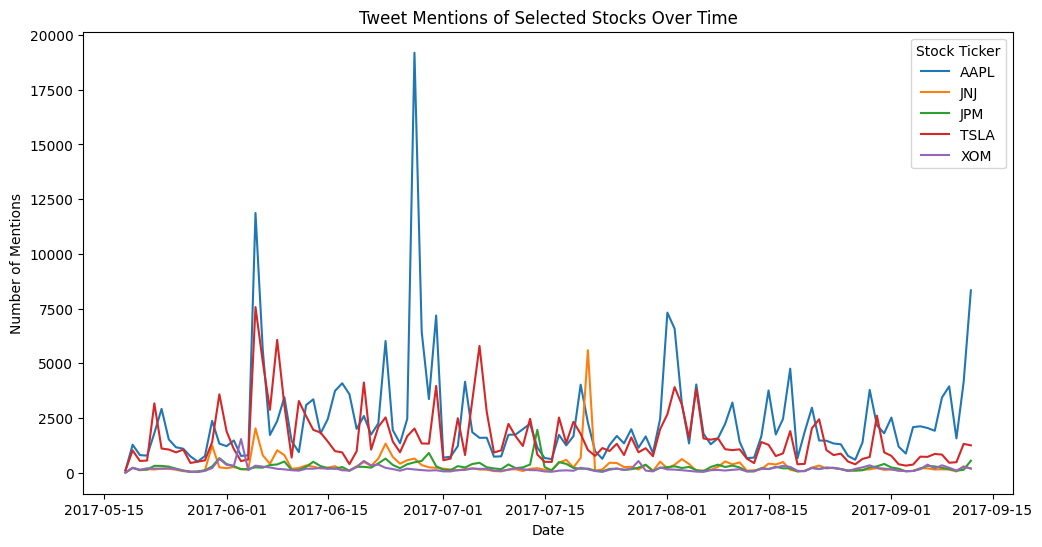

In [10]:
entities = entities[entities['entity_type'] == 'symbol']
tweet_entities = pd.merge(entities, tweets[['id', 'created_at']], left_on='tweet_id', right_on='id')


selected_stocks = ['AAPL', 'JNJ', 'JPM', 'TSLA', 'XOM']

# Filter for selected stocks
tweet_entities = tweet_entities[tweet_entities['text'].isin(selected_stocks)]

# Group by stock ticker and date, then count mentions
tweet_entities['created_at'] = pd.to_datetime(tweet_entities['created_at']).dt.date
mentions_over_time = tweet_entities.groupby(['text', 'created_at']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
mentions_over_time.T.plot(ax=ax)
ax.set_title('Tweet Mentions of Selected Stocks Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Mentions')
ax.legend(title='Stock Ticker')

plt.show()

## Part 3:

then we use histogram for shpowing distributions of all financial Per Hour.

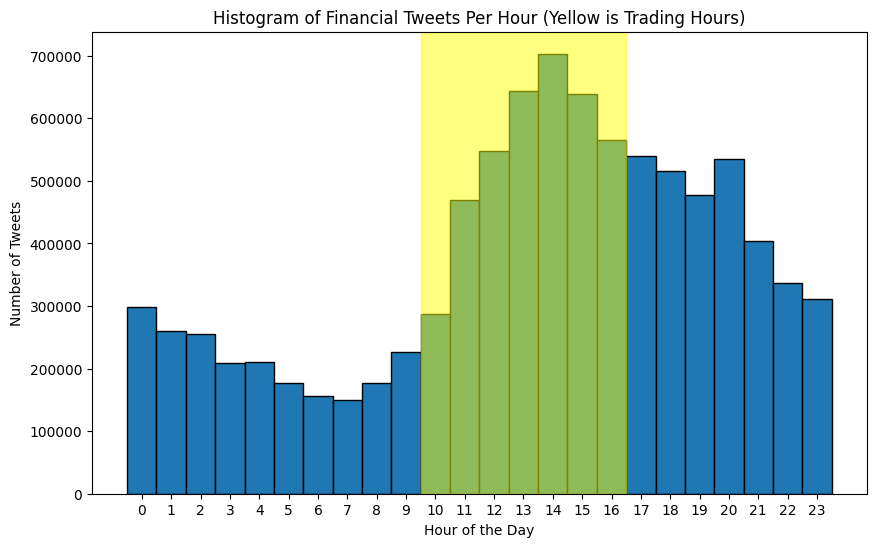

In [11]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

# Extract the hour from the 'created_at' datetime
tweets['hour'] = tweets['created_at'].dt.hour

# Count the number of tweets per hour
tweets_per_hour = tweets['hour'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(tweets_per_hour.index, tweets_per_hour.values, width=1, edgecolor="black")
plt.axvspan(9.5, 16.5, color='yellow', alpha=0.5)
plt.title('Histogram of Financial Tweets Per Hour (Yellow is Trading Hours)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(0, 24))
plt.show()

in addition we use heatmap of Number of Tweets per Hour and Day

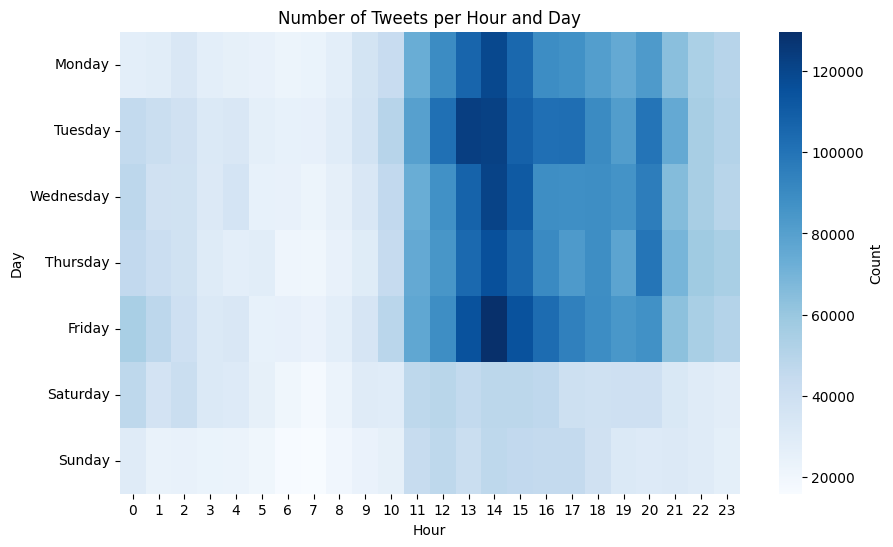

In [14]:
temp = tweets
temp['hour'] = temp['created_at'].dt.hour
temp['day_of_week'] = temp['created_at'].dt.day_name()
table = tweets.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
table = table.reindex(week)


plt.figure(figsize=(10, 6))
sns.heatmap(table, cmap='Blues', annot=False, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Number of Tweets per Hour and Day')
plt.ylabel('Day')
plt.xlabel('Hour')
plt.show()

## Part 4:
Statistics on distributions of retweets per tweets including individual stocks (at least 2 chosen stocks) over time.


like last part for showing the distributions of retweets per tweets including individual 2 stocks 'AAPL', 'TSLA' we extract the date from 'created_at' and Group it by stock ticker and date, and count retweets for continiously plot use this pyplot:

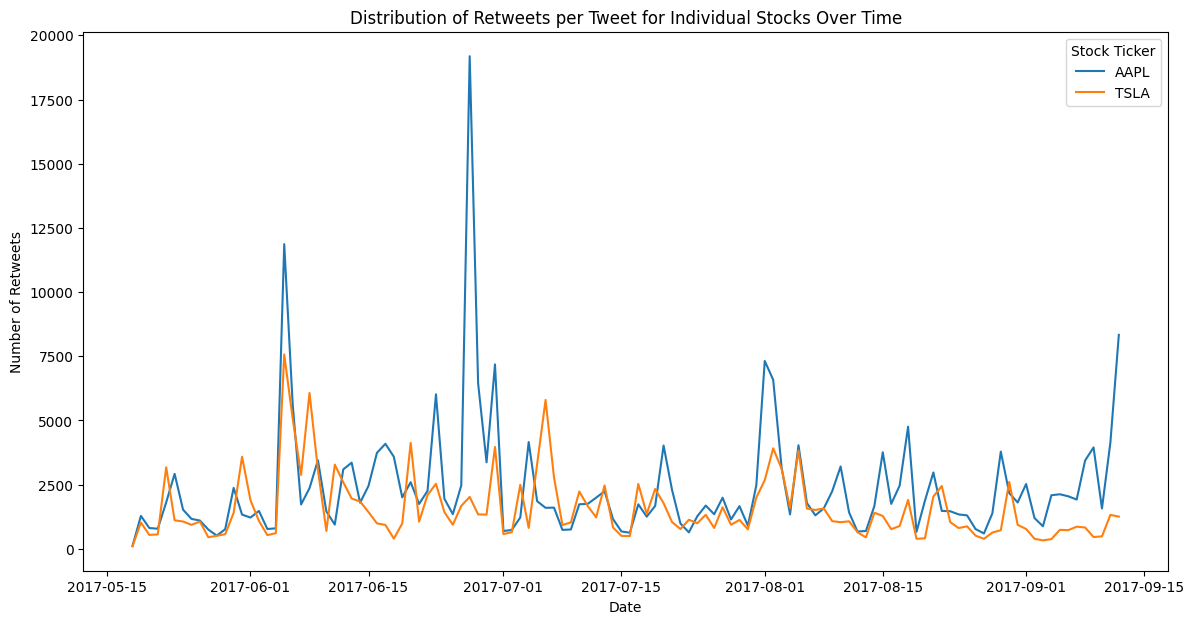

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

stock_mentions = entities[entities['entity_type'] == 'symbol']
chosen_stocks = ['AAPL', 'TSLA']

chosen_stock_mentions = stock_mentions[stock_mentions['text'].isin(chosen_stocks)]
merged_data = pd.merge(chosen_stock_mentions, tweets, left_on='tweet_id', right_on='id')
retweets = merged_data[merged_data['retweeted_status_id'].notnull()]
retweets['created_at'] = pd.to_datetime(retweets['created_at'])

# Extract the date from 'created_at'
retweets['date'] = retweets['created_at'].dt.date

# Group by stock ticker and date, and count retweets
retweet_counts = retweets.groupby(['text_x', 'date']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 7))
for stock in chosen_stocks:
    ax.plot(retweet_counts.loc[stock].index, retweet_counts.loc[stock].values, label=stock)

ax.set_title('Distribution of Retweets per Tweet for Individual Stocks Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Retweets')
ax.legend(title='Stock Ticker')
plt.grid()
plt.show()

now for showing the convertion created_at to datetime and extract the hour, we use this Histogram of Retweets per Tweet for Individual Stocks Over 24 Hours

/var/folders/pt/r_27zslx11l_t8nxfm5ybwz80000gn/T/ipykernel_4942/1835361003.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_tweets['hour'] = pd.to_datetime(stock_tweets['created_at']).dt.hour


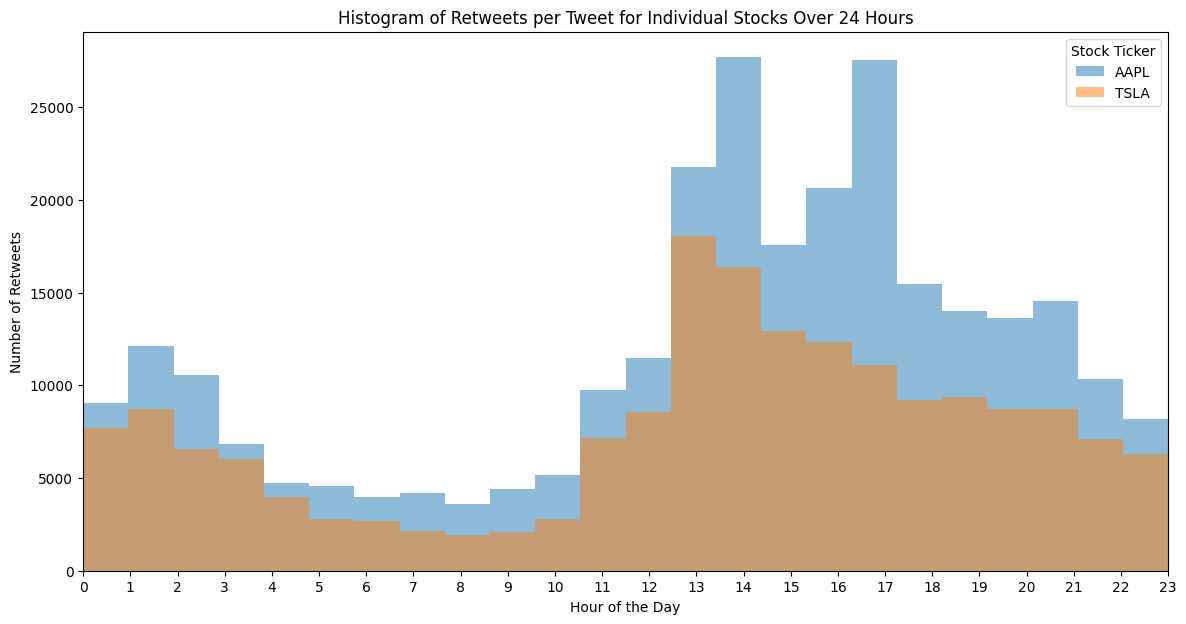

In [23]:
stock_mentions = entities[entities['entity_type'] == 'symbol'].merge(tweets, left_on='tweet_id', right_on='id')
stock_tweets = stock_mentions[stock_mentions['text_x'].isin(chosen_stocks)]

# Convert 'created_at' to datetime and extract the hour
stock_tweets['hour'] = pd.to_datetime(stock_tweets['created_at']).dt.hour
retweets = stock_tweets[stock_tweets['retweeted_status_id'].notnull()]
plt.figure(figsize=(14, 7))

for stock in chosen_stocks:
    stock_retweets = retweets[retweets['text_x'] == stock]
    hourly_retweets = stock_retweets['hour'].value_counts().sort_index()
    plt.hist(hourly_retweets.index, weights=hourly_retweets.values, bins=24, alpha=0.5, label=stock)

plt.title('Histogram of Retweets per Tweet for Individual Stocks Over 24 Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Retweets')
plt.legend(title='Stock Ticker')
plt.xticks(range(0, 24))
plt.xlim(0, 23)
plt.show()

## Part 5:

for chosen stocks 'AAPL', 'TSLA' on most important financial information and Boxplot of Capitalization for Each Exchange which is very important.

<Figure size 1000x600 with 0 Axes>

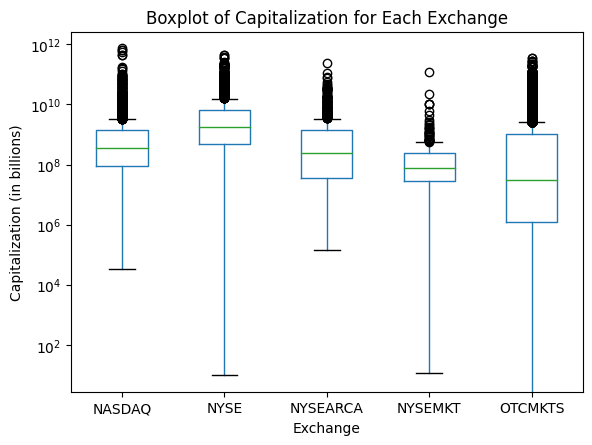

In [29]:
chosen_stocks = ['AAPL', 'TSLA']
chosen_companies = companies[companies['ticker'].isin(chosen_stocks)]

# Boxplot of Capitalization for Each Exchange
plt.figure(figsize=(10, 6))
companies.boxplot(column='capitalization', by='exchange', grid=False)
plt.title('Boxplot of Capitalization for Each Exchange')
plt.suptitle('') 
plt.xlabel('Exchange')
plt.ylabel('Capitalization (in billions)')
plt.yscale('log')  # Use a log scale for better visibility of wide ranges
plt.show();

## Part 6:
Time series movement directions through time for individual stocks (at least 2). Choose companies you are familiar with. Try to explain the reason behind these directions from real world news.

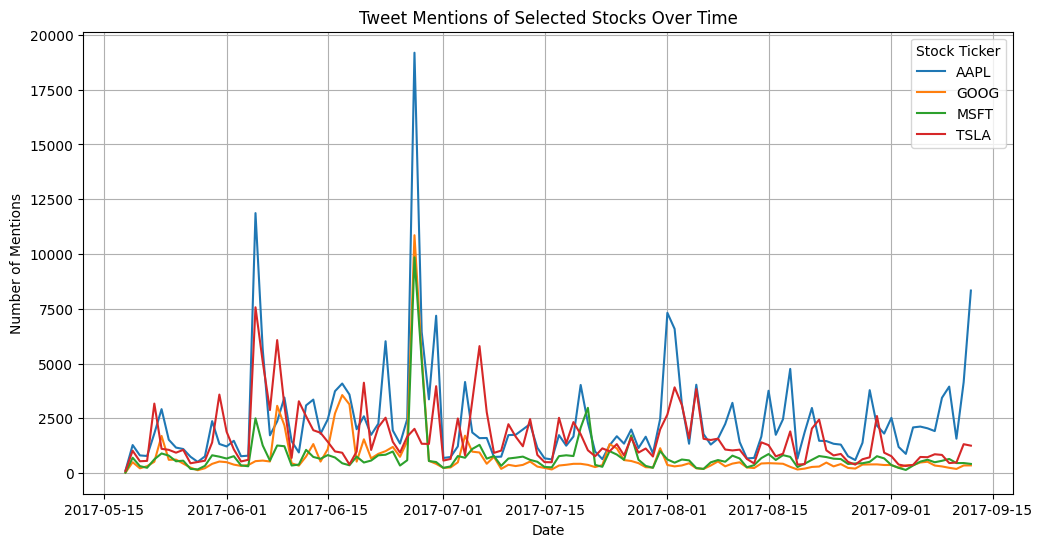

In [33]:
entities = entities[entities['entity_type'] == 'symbol']
tweet_entities = pd.merge(entities, tweets[['id', 'created_at']], left_on='tweet_id', right_on='id')


selected_stocks = ['AAPL', 'MSFT', 'TSLA', 'GOOG']

# Filter for selected stocks
tweet_entities = tweet_entities[tweet_entities['text'].isin(selected_stocks)]

# Group by stock ticker and date, then count mentions
tweet_entities['created_at'] = pd.to_datetime(tweet_entities['created_at']).dt.date
mentions_over_time = tweet_entities.groupby(['text', 'created_at']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
mentions_over_time.T.plot(ax=ax)
ax.set_title('Tweet Mentions of Selected Stocks Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Mentions')
ax.legend(title='Stock Ticker')
ax.grid()

plt.show()

And for all stocks like last parts Number of Tweets per hour and showing trade hours by color yellow 

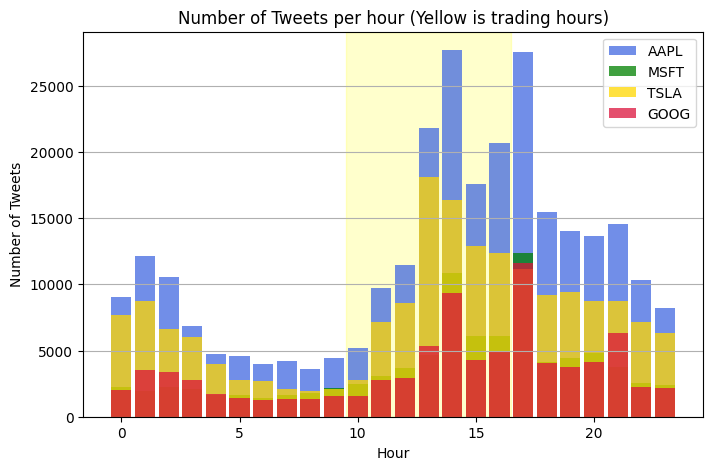

In [52]:
colors = ['royalblue', 'green', 'gold', 'crimson']
plt.figure(figsize=(8, 5))
plt.axvspan(9.5, 16.5, color='yellow', alpha=0.2)

for i, stock in enumerate(selected_stocks):
    stocks_tweet = entities[entities['text'] == stock]
    stocks_tweeted = tweets[tweets['id'].isin(stocks_tweet['tweet_id'])]
    plt.bar(stocks_tweeted.hour.value_counts().sort_index().index, stocks_tweeted.hour.value_counts().sort_index(),
                label=stock, color=colors[i], alpha=0.75, width=0.85)


plt.xlabel('Hour')
plt.grid(axis = 'y')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per hour (Yellow is trading hours)')
plt.legend()
plt.show()

And for all stocks like last parts Number of Tweets weekly, we use stack bars and bc stocks is discrimiate ae show it by color and bc number of tweets are too high we use continouslu bar and for both we use satch bar.

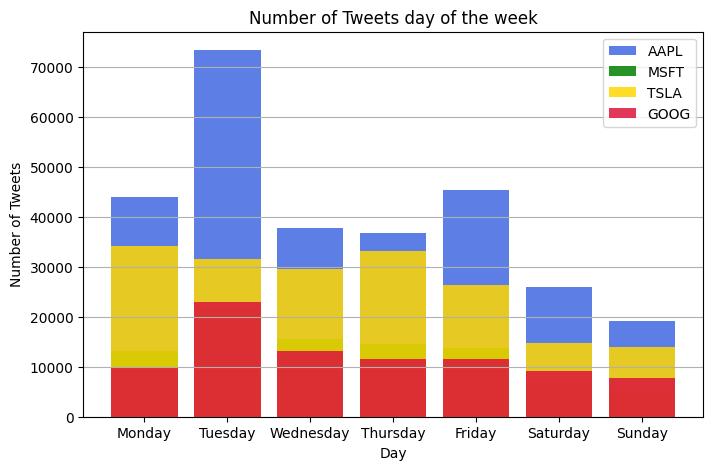

In [53]:
plt.figure(figsize=(8, 5))
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, stock in enumerate(selected_stocks):
    stocks_tweet = entities[entities['text'] == stock]
    stocks_tweeted = tweets[tweets['id'].isin(stocks_tweet['tweet_id'])]
    plt.bar(stocks_tweeted['created_at'].dt.day_name().value_counts().sort_index().reindex(order_of_days).index,
            stocks_tweeted['created_at'].dt.day_name().value_counts().sort_index().reindex(order_of_days),
            color=colors[i], label=stock, alpha=0.85)
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets day of the week')
plt.legend()
plt.grid(axis='y')

## Part 7:

For Co-occurrence of various stocks in the same tweets, we use heatmap.

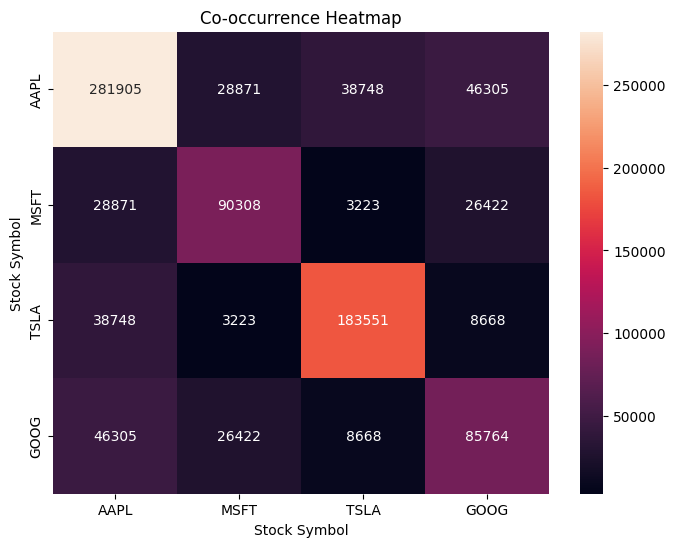

In [56]:
tweet_list = []
for stock in selected_stocks:
    stocks_tweet = entities[entities['text'] == stock]
    stocks_tweeted = tweets[tweets['id'].isin(stocks_tweet['tweet_id'])].id.to_list()
    tweet_list.append(stocks_tweeted)


sets = [set(map(str, lst)) for lst in tweet_list]
co_occurrence_matrix = [[len(set(sets[i]).intersection(sets[j])) for j in range(len(sets))] for i in range(len(sets))]

df = pd.DataFrame(co_occurrence_matrix, index=selected_stocks, columns=selected_stocks)

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt='d', cbar=True)
plt.title('Co-occurrence Heatmap')
plt.xlabel('Stock Symbol')
plt.ylabel('Stock Symbol')
plt.show()